In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

In [11]:
# Define the function for the system of differential equations
def f(state, t, mu, beta, sigma, rho, gamma, T):
    S, Q, A = state  # Unpack the state vector
    dSdt = beta * S * (1 - S - Q - A) / T - rho * S * A / T + sigma * Q * S - mu * S
    dQdt = rho * S * A / T - sigma * Q * S - gamma * Q - mu * Q
    dAdt = T * mu * rho - A * mu + Q * gamma
    return [dSdt, dQdt, dAdt]

# Define the initial conditions and time points
state0 = [89.11, 180, 70]
t = np.arange(0.0, 40.0, 0.01)

# Create a function to simulate and plot the system
def simulate_system(mu, beta, sigma, rho, gamma, T):
    states = odeint(f, state0, t, args=(mu, beta, sigma, rho, gamma, T))

    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.plot(states[:, 0], states[:, 1], states[:, 2])
    ax.set_xlabel('$S$')
    ax.set_ylabel('$Q$')
    ax.set_zlabel('$A$')
    ax.set_title('Nonlinear System Simulation')
    plt.show()

# Create interactive widgets for parameter values
mu_slider = widgets.FloatSlider(value=0.12, min=0.01, max=0.2, step=0.01, description='mu:')
beta_slider = widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='beta:')
sigma_slider = widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='sigma:')
rho_slider = widgets.FloatSlider(value=0.34, min=0.1, max=1.0, step=0.01, description='rho:')
gamma_slider = widgets.FloatSlider(value=0.042, min=0.001, max=0.1, step=0.001, description='gamma:')
T_slider = widgets.FloatSlider(value=100000, min=10000, max=200000, step=10000, description='T:')

# Create an interactive interface
interactive_plot = widgets.interactive(simulate_system, mu=mu_slider, beta=beta_slider, sigma=sigma_slider, rho=rho_slider, gamma=gamma_slider, T=T_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.12, description='mu:', max=0.2, min=0.01, step=0.01), FloatSlider(va…

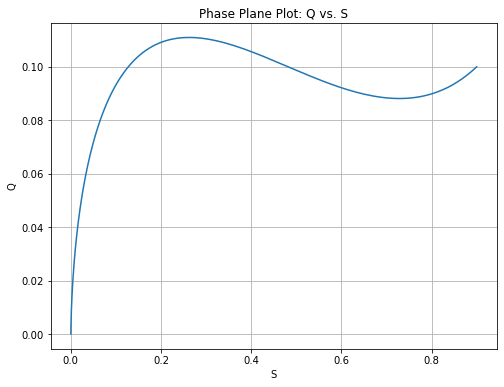

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function for the system of differential equations
def f(state, t, mu, beta, sigma, rho, gamma, T):
    S, Q, A = state
    dSdt = beta * S * (1 - S - Q - A) / T - rho * S * A / T + sigma * Q * S - mu * S
    dQdt = rho * S * A / T - sigma * Q * S - gamma * Q - mu * Q
    dAdt = T * mu * rho - A * mu + Q * gamma
    return [dSdt, dQdt, dAdt]

# Define parameter values
mu = 0.12
beta = 0.01
sigma = 0.01
rho = 0.34
gamma = 0.042
T = 100000

# Initial conditions
S0 = 0.9  # Initial value for S
Q0 = 0.1  # Initial value for Q
A0 = 0.0  # Initial value for A
state0 = [S0, Q0, A0]

# Time points for simulation
t = np.linspace(0, 100, 1000)

# Solve the system of differential equations
states = odeint(f, state0, t, args=(mu, beta, sigma, rho, gamma, T))

# Extract S and Q values from the simulation
S_values = states[:, 0]
Q_values = states[:, 1]

# Create a phase plane plot
plt.figure(figsize=(8, 6))
plt.plot(S_values, Q_values)
plt.xlabel('S')
plt.ylabel('Q')
plt.title('Phase Plane Plot: Q vs. S')
plt.grid(True)
plt.show()


In [15]:
# Define the function for the system of differential equations
def f(state, t, mu, beta, sigma, rho, gamma, T):
    S, Q, A = state
    dSdt = beta * S * (1 - S - Q - A) / T - rho * S * A / T + sigma * Q * S - mu * S
    dQdt = rho * S * A / T - sigma * Q * S - gamma * Q - mu * Q
    dAdt = T * mu * rho - A * mu + Q * gamma
    return [dSdt, dQdt, dAdt]

# Create a function to simulate and plot the phase plane
def plot_phase_plane(S0, Q0):
    # Set parameter values
    mu = 0.12
    beta = 0.01
    sigma = 0.01
    rho = 0.34
    gamma = 0.042
    T = 100000

    # Initial conditions
    state0 = [S0, Q0, 0.0]

    # Time points for simulation
    t = np.linspace(0, 100, 1000)

    # Solve the system of differential equations
    states = odeint(f, state0, t, args=(mu, beta, sigma, rho, gamma, T))

    # Extract S and Q values from the simulation
    S_values = states[:, 0]
    Q_values = states[:, 1]

    # Create a phase plane plot
    plt.figure(figsize=(8, 6))
    plt.plot(S_values, Q_values)
    plt.xlabel('S')
    plt.ylabel('Q')
    plt.title('Phase Plane Plot: Q vs. S')
    plt.grid(True)
    plt.show()

# Create interactive widgets for initial conditions
S0_slider = widgets.FloatSlider(value=0.9, min=0.0, max=1.0, step=0.01, description='Initial S:')
Q0_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='Initial Q:')

# Create an interactive interface
interactive_plot = widgets.interactive(plot_phase_plane, S0=S0_slider, Q0=Q0_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=0.9, description='Initial S:', max=1.0, step=0.01), FloatSlider(value=…

In [16]:
# Define the function for the system of differential equations
def f(state, t, mu, beta, sigma, rho, gamma, T):
    S, Q, A = state
    dSdt = beta * S * (1 - S - Q - A) / T - rho * S * A / T + sigma * Q * S - mu * S
    dQdt = rho * S * A / T - sigma * Q * S - gamma * Q - mu * Q
    dAdt = T * mu * rho - A * mu + Q * gamma
    return [dSdt, dQdt, dAdt]

# Create a function to simulate and plot the phase plane for Q and A
def plot_phase_plane_QA(Q0, A0):
    # Set parameter values
    mu = 0.12
    beta = 0.01
    sigma = 0.01
    rho = 0.34
    gamma = 0.042
    T = 100000

    # Initial conditions
    state0 = [0.9, Q0, A0]

    # Time points for simulation
    t = np.linspace(0, 100, 1000)

    # Solve the system of differential equations
    states = odeint(f, state0, t, args=(mu, beta, sigma, rho, gamma, T))

    # Extract Q and A values from the simulation
    Q_values = states[:, 1]
    A_values = states[:, 2]

    # Create a phase plane plot for Q and A
    plt.figure(figsize=(8, 6))
    plt.plot(Q_values, A_values)
    plt.xlabel('Q')
    plt.ylabel('A')
    plt.title('Phase Plane Plot: A vs. Q')
    plt.grid(True)
    plt.show()

# Create interactive widgets for initial conditions of Q and A
Q0_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='Initial Q:')
A0_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Initial A:')

# Create an interactive interface
interactive_plot_QA = widgets.interactive(plot_phase_plane_QA, Q0=Q0_slider, A0=A0_slider)
display(interactive_plot_QA)


interactive(children=(FloatSlider(value=0.1, description='Initial Q:', max=1.0, step=0.01), FloatSlider(value=…

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display

# Define the function for the system of differential equations
def f(state, t, mu, beta, sigma, rho, gamma, T):
    S, Q, A = state
    dSdt = beta * S * (1 - S - Q - A) / T - rho * S * A / T + sigma * Q * S - mu * S
    dQdt = rho * S * A / T - sigma * Q * S - gamma * Q - mu * Q
    dAdt = T * mu * rho - A * mu + Q * gamma
    return [dSdt, dQdt, dAdt]

# Create a function to simulate and plot the phase plane for S and A
def plot_phase_plane_SA(S0, A0):
    # Set parameter values
    mu = 0.12
    beta = 0.01
    sigma = 0.01
    rho = 0.34
    gamma = 0.042
    T = 100000

    # Initial conditions
    state0 = [S0, 0.1, A0]

    # Time points for simulation
    t = np.linspace(0, 100, 1000)

    # Solve the system of differential equations
    states = odeint(f, state0, t, args=(mu, beta, sigma, rho, gamma, T))

    # Extract S and A values from the simulation
    S_values = states[:, 0]
    A_values = states[:, 2]

    # Create a phase plane plot for S and A
    plt.figure(figsize=(8, 6))
    plt.plot(S_values, A_values)
    plt.xlabel('S')
    plt.ylabel('A')
    plt.title('Phase Plane Plot: A vs. S')
    plt.grid(True)
    plt.show()

# Create interactive widgets for initial conditions of S and A
S0_slider = widgets.FloatSlider(value=0.9, min=0.0, max=1.0, step=0.01, description='Initial S:')
A0_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Initial A:')

# Create an interactive interface
interactive_plot_SA = widgets.interactive(plot_phase_plane_SA, S0=S0_slider, A0=A0_slider)
display(interactive_plot_SA)


interactive(children=(FloatSlider(value=0.9, description='Initial S:', max=1.0, step=0.01), FloatSlider(value=…